In [ ]:
# Import Required Libraries

# pandas & numpy → data manipulation
# matplotlib & seaborn → visualization
# %matplotlib inline → ensures plots render in notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Data Loading & Initial Exploration

We begin by loading the Telco Customer Churn dataset and inspecting its structure to understand:
- The number of observations and features
- Data types
- Potential data quality issues
- Class distribution of the target variable (`Churn`)


In [ ]:
# Load Telco Customer Churn Dataset

# Dataset: IBM Telco Customer Churn
# Source: Downloaded from Kaggle and stored locally in data/raw directory
# Objective: Explore customer attributes associated with churn behavior

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dataset Dimensions
# Understanding number of rows (customers) and columns (features)

df.shape

(7043, 21)

### Dataset Size

The dataset contains 7,043 customer records and 21 features.

This provides sufficient data volume for both exploratory analysis and predictive modeling.

In [ ]:
# Data Structure & Type Inspection

# This helps identify:
# - Data types (categorical vs numerical)
# - Potential type mismatches
# - Missing values

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

### Data Structure Observations

- Most features are categorical (stored as object/string).
- `tenure` and `MonthlyCharges` are numerical.
- `TotalCharges` is currently stored as a string and will require conversion to numeric data type.
- No immediate null values are visible in the non-null count summary.

Next step will include verifying numeric consistency and potential hidden missing values.


In [23]:
# Data Cleaning: Convert 'TotalCharges' to Numeric

# Observation:
# 'TotalCharges' is stored as an object (string), but it should be numeric.

# Possible issue:
# Some rows may contain blank strings (" ") which prevent direct conversion.

# We will:
# 1. Convert to numeric
# 2. Coerce errors into NaN
# 3. Handle resulting missing values appropriately

# Convert to numeric, forcing invalid parsing to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many values became NaN after conversion
df['TotalCharges'].isna().sum()

np.int64(11)

### Why Missing Values Appeared After Conversion

Although `df.info()` initially showed no missing values in `TotalCharges`,
the column contained blank strings (" "), which are treated as valid string entries
and not as null values.

When converting the column to numeric using `errors='coerce'`,
these invalid string entries were converted into `NaN`.

This reveals hidden data quality issues that were not visible during initial inspection.


In [22]:
# Inspect rows where TotalCharges is NaN
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Investigation of Missing TotalCharges

11 rows contain missing values in `TotalCharges` after conversion.

Inspection reveals that all affected customers have tenure equal to 0,
indicating they are newly acquired customers with no accumulated billing history.

This suggests the missing values are not random but structurally related
to customer tenure.


In [26]:
# Since TotalCharges represents cumulative billing amount,
# customers with tenure = 0 logically have total charges of 0.

df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Confirm no remaining missing values
df['TotalCharges'].isna().sum()

np.int64(0)

### Handling Strategy

Missing `TotalCharges` values were replaced with 0, as this accurately reflects
the business logic: customers with zero tenure have not yet accumulated charges.

This approach preserves all observations and maintains data integrity.

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Univariate Analysis: Exploring Individual Feature Distributions

In this section, we examine each feature independently to understand its distribution, spread, and potential anomalies before analyzing relationships with the target variable (`Churn`).

The objective is to:

- Understand the distribution of numerical features (e.g., tenure, charges).

- Identify skewness, outliers, or unusual patterns.

- Examine the frequency distribution of categorical variables.

- Detect potential imbalance or high-cardinality features.

- Inform preprocessing decisions such as transformation, encoding, or scaling.

Univariate analysis provides foundational insight into the dataset and ensures we fully understand feature behavior before modeling.

In [7]:
# The code below returns a count of unique values in the churn table.
# We are doing this to check the class distribution of the target variable 'Churn' 
# This helps determine whether the dataset is imbalanced.
# Class imbalance can cause models to favor the majority class,
# leading to misleading accuracy scores and poor recall for churners.
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

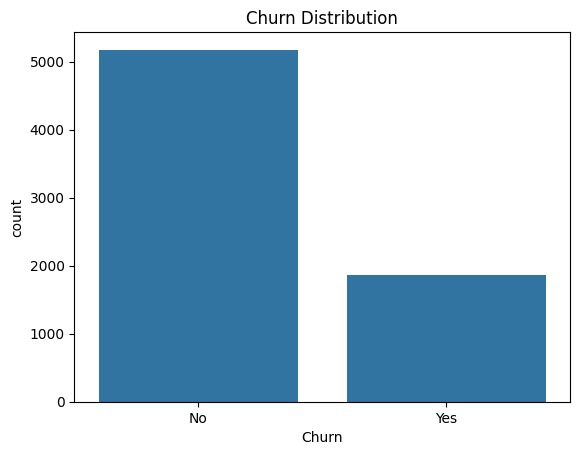

In [ ]:
# Univariate Analysis: Target Variable Distribution (Churn)

# Objective:
# Visualize the proportion of churned vs retained customers.
# Class imbalance can bias models toward the majority class.

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

### Interpretation: Churn Distribution

The target variable shows a moderate class imbalance:

- Approximately **73%** of customers did not churn.
- Approximately **27%** of customers churned.

While the imbalance is not extreme, it is significant enough to influence model evaluation. A naive model predicting all customers as “No churn” would already achieve ~73% accuracy, which could be misleading.

This indicates that evaluation metrics such as:

- Precision  
- Recall  
- F1-score  
- ROC-AUC  

will be more informative than accuracy alone.

From a business perspective, correctly identifying churners (the minority class) is more valuable than optimizing overall accuracy, since churners represent potential revenue loss.


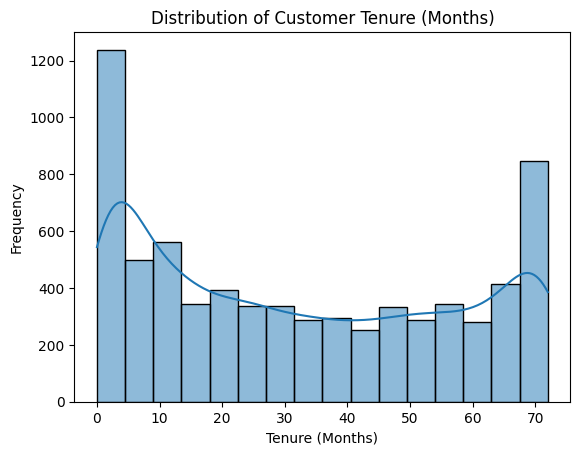

In [29]:
# Univariate Analysis: Tenure Distribution

# Objective:
# Examine how long customers typically stay with the company.
# Tenure reflects customer lifecycle maturity and may indicate retention stability.

sns.histplot(df['tenure'], kde=True)
plt.title("Distribution of Customer Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()


### Interpretation: Tenure Distribution

The distribution of customer tenure shows a high concentration of customers in the early months (0–5 months), as well as a noticeable number of long-term customers near the upper tenure range.

This indicates that the customer base consists of both newly acquired customers and established long-term subscribers.

The distribution appears slightly bimodal, suggesting two dominant tenure clusters:
- Early-stage customers
- Mature, long-tenure customers

At this stage, this analysis is purely descriptive.  
Further bivariate analysis will determine whether tenure length is associated with churn behavior.


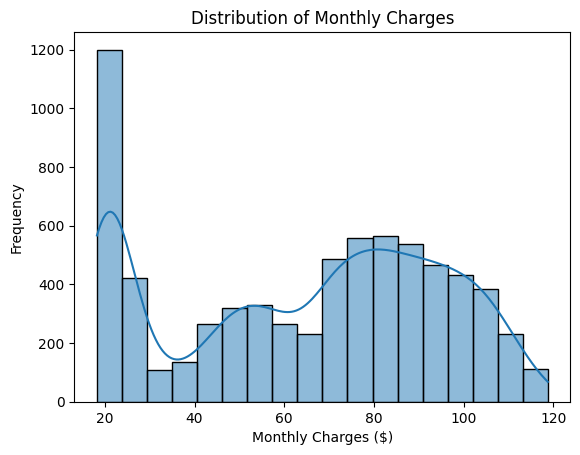

In [31]:
# Univariate Analysis: Monthly Charges Distribution

# Objective:
# Understand how billing amounts are distributed across customers.
# This helps identify pricing tiers, clustering, or skewness.

sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency")
plt.show()

### Interpretation: Monthly Charges Distribution

The distribution of MonthlyCharges shows multiple concentration regions rather than a single normal peak.

There appears to be:
- A cluster of customers at the lower pricing range (around $20–$30).
- A broader concentration in the mid-to-higher pricing range (approximately $70–$100).

This suggests the presence of different pricing tiers or bundled service levels within the customer base.

The distribution does not appear perfectly symmetric and may indicate segmentation across service packages.

At this stage, this analysis is purely descriptive.  
Further bivariate analysis will determine whether pricing levels are associated with churn behavior.


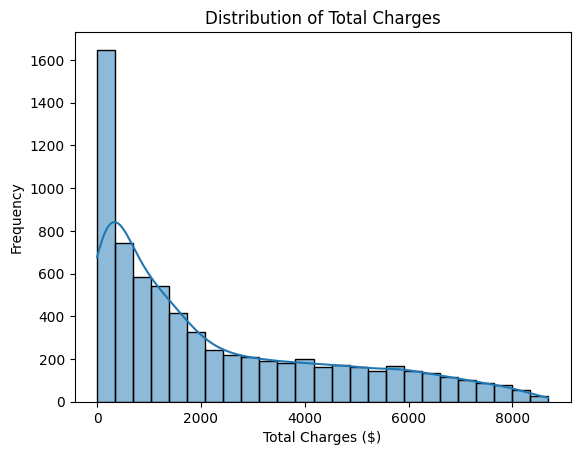

In [32]:
# Univariate Analysis: Total Charges Distribution
# Objective:
# Analyze cumulative billing amounts.
# Since TotalCharges depends on tenure, we expect right skew.

sns.histplot(df['TotalCharges'], kde=True)
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Frequency")
plt.show()

### Interpretation: Total Charges Distribution

The distribution of TotalCharges is strongly right-skewed.

Most customers have relatively low cumulative charges, while a smaller proportion of customers exhibit very high total charges.

This pattern is expected, as TotalCharges represents accumulated billing over time. Customers with longer tenure naturally accumulate higher total charges, creating a long tail toward larger values.

There are no visible extreme anomalies beyond the expected long-tail behavior.

At this stage, the distribution confirms structural dependence on tenure but does not yet indicate whether higher cumulative charges are associated with churn. This relationship will be evaluated during bivariate analysis.


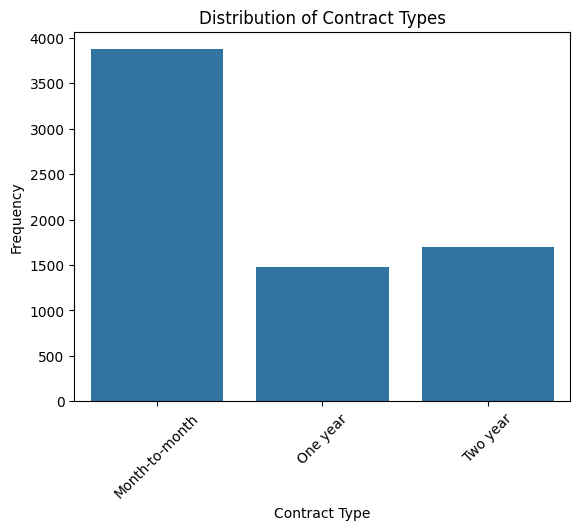

In [35]:
# Univariate Analysis: Contract Type Frequency
# Objective:
# Examine how customers are distributed across contract types.
# This helps detect class dominance and potential structural imbalance.

df['Contract'].value_counts(normalize=True)

sns.countplot(x='Contract', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Frequency')
plt.title("Distribution of Contract Types")
plt.xticks(rotation=45)
plt.show()

### Interpretation: Contract Type Distribution

The majority of customers are on **Month-to-month contracts**, significantly outnumbering those on One-year and Two-year contracts.

Key observations:

- Month-to-month contracts represent the largest segment of the customer base.
- Long-term contracts (One-year and Two-year) collectively make up a smaller portion.
- Two-year contracts slightly exceed One-year contracts in count.

Business implications (distribution only — not churn yet):

- The company relies heavily on flexible, short-term subscription agreements.
- A large portion of customers are not contractually locked in long-term.
- This may increase revenue volatility, as month-to-month customers have lower switching barriers.

At this stage, this analysis only describes contract structure composition.
The relationship between contract type and churn will be explored in the bivariate section.


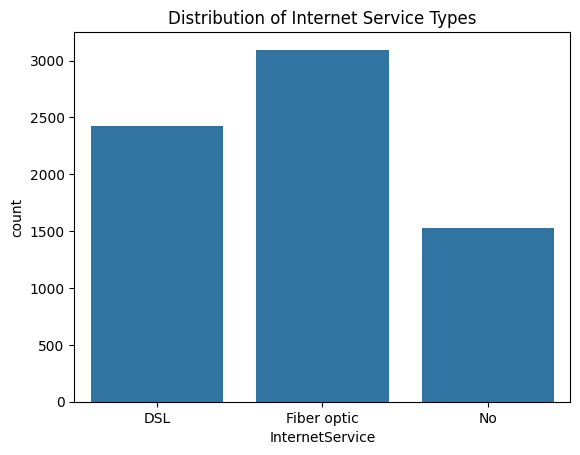

In [36]:
# Univariate Analysis: Internet Service Type Distribution
# Objective:
# Understand adoption levels of DSL, Fiber optic, or no internet service.

df['InternetService'].value_counts(normalize=True)

sns.countplot(x='InternetService', data=df)
plt.title("Distribution of Internet Service Types")
plt.show()


In [ ]:
# Univariate Analysis: Payment Method Distribution
# Objective:
# Examine how customers pay for services.
# Useful for detecting dominant categories and potential behavioral signals.

df['PaymentMethod'].value_counts(normalize=True)

sns.countplot(x='PaymentMethod', data=df)
plt.title("Distribution of Payment Methods")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Outlier Check: Tenure
sns.boxplot(y=df['tenure'])
plt.title("Tenure Boxplot")
plt.show()

# Outlier Check: Monthly Charges
sns.boxplot(y=df['MonthlyCharges'])
plt.title("Monthly Charges Boxplot")
plt.show()

# Outlier Check: Total Charges
sns.boxplot(y=df['TotalCharges'])
plt.title("Total Charges Boxplot")
plt.show()


## Bivariate Analysis: Understanding Key Drivers of Churn

In this section, we examine the relationship between the target variable (`Churn`) and selected customer features to identify patterns that differentiate churners from retained customers.

The objective is to:
- Detect segments with elevated churn risk.
- Quantify how churn rates vary across categorical and numerical variables.
- Generate business hypotheses for customer retention strategies.
- Inform feature selection and modeling decisions in later stages.

While this analysis does not establish causality, it highlights statistically meaningful associations that may contribute to churn risk.


**The following visualizations compare churn behavior across pricing, contract structure, service type, and customer tenure to identify potential structural drivers of churn.**

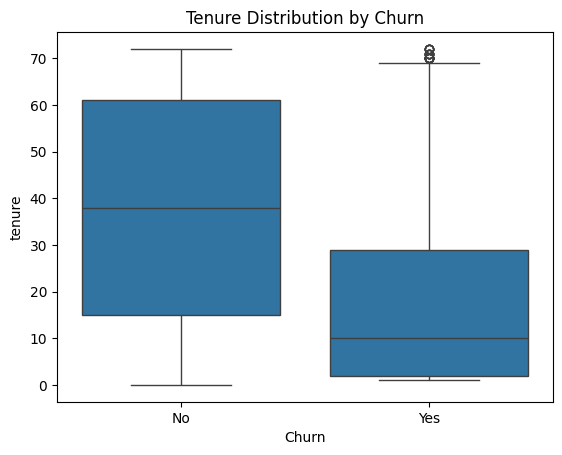

In [15]:
# Tenure vs Churn (Boxplot)

# Objective:
# Analyze how customer tenure (length of relationship in months)
# differs between churners and retained customers.

# Why this matters:
# Tenure often reflects customer lifecycle maturity.
# Early-stage customers may churn due to onboarding friction,
# unmet expectations, or lack of engagement.


sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure Distribution by Churn")
plt.show()

### Interpretation: Tenure vs Churn

**What we observe:**
- Customers who churn tend to have significantly lower tenure.
- Retained customers show a much wider and higher tenure distribution.
- The median tenure for churners is substantially lower than for non-churners.

**Business Implication:**
Churn is concentrated among early-stage customers. This suggests that the first few months of the customer lifecycle are critical.

**Potential Actions:**
- Strengthen onboarding experience.
- Implement early engagement campaigns within the first 90 days.
- Trigger proactive retention outreach for low-tenure customers.

**Modeling Insight:**
Tenure is likely a strong predictive feature and should be retained for modeling.


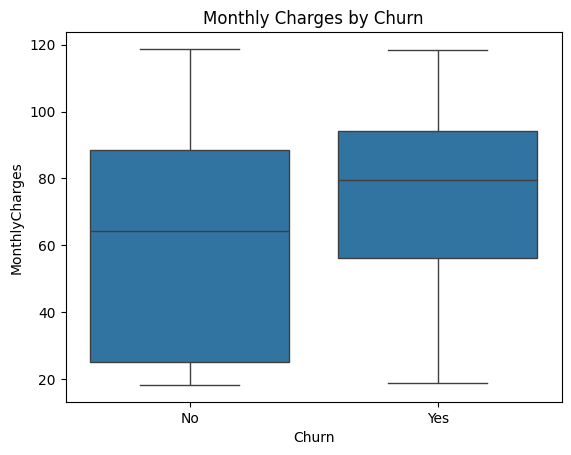

In [ ]:
# Monthly Charges vs Churn (Boxplot)

# Objective:
# Examine whether pricing level (monthly bill amount)
# differs between churners and retained customers.

# Why this matters:
# Pricing sensitivity or perceived value gaps may drive churn behavior.

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

### Interpretation: Monthly Charges vs Churn

**What we observe:**
- Customers who churn tend to have higher median monthly charges.
- The distribution for churners is shifted upward relative to retained customers.

**Business Implication:**
Higher-priced plans may increase churn risk, potentially due to:
- Price sensitivity
- Perceived lack of value
- Service dissatisfaction relative to cost

**Potential Actions:**
- Evaluate pricing structure for high-cost plans.
- Offer targeted discounts or loyalty incentives for high-bill customers.
- Improve perceived value communication for premium tiers.

**Modeling Insight:**
MonthlyCharges appears to have predictive power and should be included in the model.


In [ ]:
# Contract Type vs Churn (Crosstab)

# Objective:
# Quantify churn rates across different contract types.

# normalize='index' ensures we calculate churn rate
# within each contract category.

pd.crosstab(df['Contract'], df['Churn'], normalize='index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


### Interpretation: Contract Type vs Churn (Churn Rates)

**What we observe:**
- Month-to-month contracts show the highest churn rate.
- One-year contracts significantly reduce churn.
- Two-year contracts have the lowest churn rate.

**Business Implication:**
Longer-term contracts strongly correlate with customer retention.

**Potential Actions:**
- Incentivize upgrades from month-to-month to annual contracts.
- Offer discounts or loyalty bonuses for longer commitments.
- Prioritize retention campaigns for month-to-month customers.

**Modeling Insight:**
Contract type is likely one of the strongest predictors of churn.


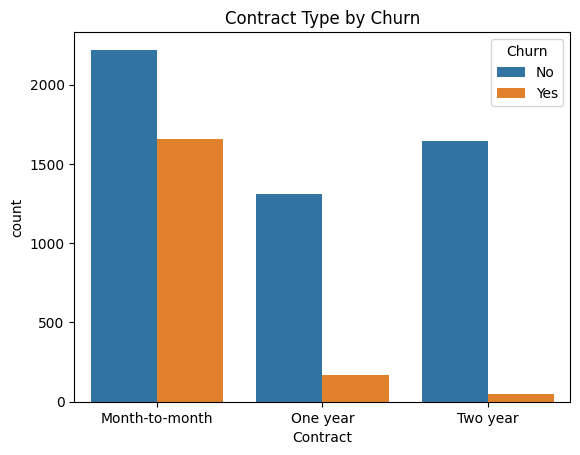

In [ ]:
# Contract Type vs Churn (Customer Volume)

# This visualization shows the absolute number of churners
# within each contract category.
# Volume matters because a high-risk segment with large population
# can drive the majority of churn losses.

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type by Churn')
plt.show()

In [ ]:
# Internet Service vs Churn (Churn Rates)

# Analyze churn rate across DSL, Fiber optic, and No Internet groups.


pd.crosstab(df['InternetService'], df['Churn'], normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


### Interpretation: Internet Service vs Churn (Churn Rates)

**What we observe:**
- Fiber optic customers exhibit the highest churn rate.
- DSL customers have moderate churn.
- Customers without internet service show the lowest churn.

**Business Implication:**
Fiber optic customers may experience dissatisfaction, higher expectations, or price sensitivity.

**Potential Actions:**
- Investigate service reliability for fiber optic customers.
- Analyze support ticket patterns.
- Evaluate pricing competitiveness for fiber plans.

**Modeling Insight:**
InternetService type appears strongly associated with churn and should be included in modeling.


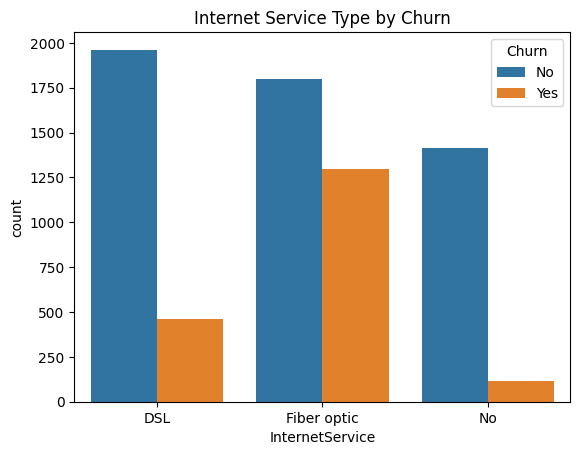

In [ ]:
# Internet Service vs Churn (Customer Volume)

# This visualization shows churn volume across service types.

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service Type by Churn')
plt.show()